## Sequential vs Functional Model in Keras

https://becominghuman.ai/sequential-vs-functional-model-in-keras-20684f766057

How to construct a Neural Network using both sequential and functional model. As far as I know most of Neural Network tutorials out there are using sequential model, probably because it is more intuitive for simple architectures, even though in fact Functional model is actually not that complicated.

Fashion MNIST dataset which consists of 60000 train data and 10000 test data, in which each of those images have the size of 28 by 28 pixels (similar to MNIST Digit dataset). Next, two exact same classifier model will be created and trained. The first one is done using sequential style while the second one is using functional style.

Lastly, will be explained a bit why it is important to get familiar with functional style, especially if you’re interested to learn more about Neural Network-based models. So that’s it, let’s start doing this little project.

The first thing to do is to import all required modules. Notice that the Fashion MNIST dataset is already available in Keras, and it can just be loaded using fashion_mnist.load_data() command.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.datasets import fashion_mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Input
# Loading MNIST Fashion dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

By the way you can show the first several images of the MNIST dataset using the following code:

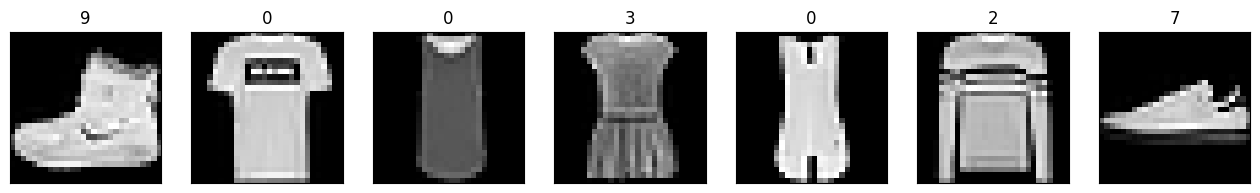

In [9]:
fig, axes = plt.subplots(ncols=7, sharex=False,
                         sharey=True, figsize=(16, 4))
for i in range(7):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)

After running the code above, you should get an output of the first 7 images in the dataset along with the labels. As you can see the image below, those labels are already mapped to a particular number. If you check Keras documentation, you will be able to find out what those numbers actually mean.

## Preprocessing

Let’s get back into our X variables. Initially, each of the images stored in X_train and X_test is in form of 2-dimensional array with the shape of (28, 28), in which this size represents the height and width of the handwritten digit images. Before training the model, we need to flatten all those images first. It can be achieved by using NumPy reshape() function. The argument passed in this function represents the new shape that we want, in this case it’s (number of data, 28*28).

In [10]:
# Reshape all images (from 28x28 to 784)
X_train =   X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test =   X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])

After running the code above, our X_train and X_test should have the shape of (60000, 784) and (10000, 784) respectively. Next, we also need to turn the target label (both y_train and y_test) into one-hot format. Use the following code to do that:

In [11]:
# Convert label to one-hot representation
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
    
y_train = np.array(temp)
temp = []
for i in range(len(y_test)):
    temp.append(to_categorical(y_test[i], num_classes=10))
y_test = np.array(temp)

Up to this stage we have already converted all train and test data along with its labels into the correct shape for our Neural Network model. So now we can start to construct the model architecture, I will start with Sequential model first.

## Sequential Model

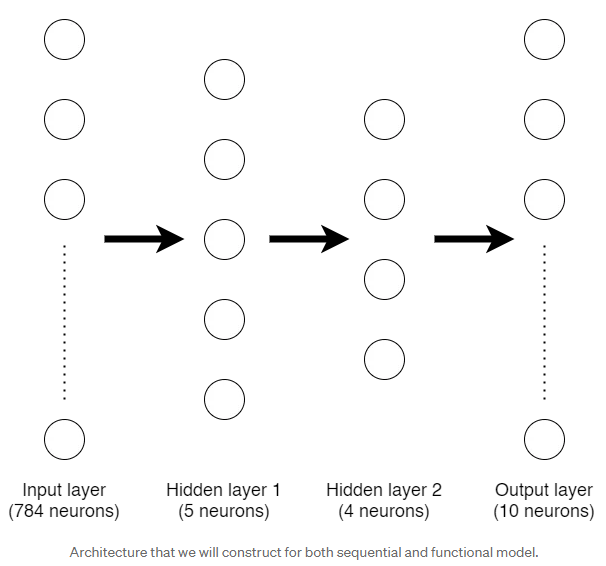

The first thing to do when we are about to create a sequential model is to initialize it first. The code below shows that we are initializing a new model called model_seq.

In [12]:
model_seq = Sequential()

Initially, this model_seq variable is just an empty Neural Network model until we add more layers sequentially starting from the beginning. Now I wanna create a Neural Network architecture like the one drawn in the figure above. To add layers into the model, we can use the following code.

In [14]:
X_train.shape[1]

784

In [15]:
model_seq.add(Dense(5, activation='sigmoid', input_shape(X_train.shape[1],)))
model_seq.add(Dense(4, activation='sigmoid'))
model_seq.add(Dense(10, activation='softmax'))

The first layer that we add to model_seq is a dense (a.k.a. fully-connected) layer with 5 neurons. Keep in mind that the first layer added in a sequential model is not the input layer, it is our first hidden layer instead. The input layer is defined using input_shape argument, in this case I passed the shape of X_train variable which has the value of 784 (this is the number of our flattened image pixels).

Next, I add more hidden layer which consists of 4 neurons and an output layer of 10 neurons. Remember that we have 10 labels for this classification problem, so we need to use 10 neurons as well for the output layer.

Now since we already done constructing the architecture, we can print out the summary of the model simply by using model_seq.summary() command which directly gives output like this:

In [18]:
model_seq.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,190
Trainable params: 3,190
Non-trainable params: 0
_________________________________________________________________


After that, we can compile and train the model using our X_train and y_train data pairs. I decided to use categorical cross entropy loss function and Adam optimizer with 3 epochs.

In [17]:
model_seq.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['acc'])
model_seq.fit(X_train, y_train, epochs=3, 
              validation_data=(X_test,y_test))

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 1.9894 - acc: 0.2819 - val_loss: 1.7633 - val_acc: 0.3208
Epoch 2/3
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6327 - acc: 0.3498 - val_loss: 1.5220 - val_acc: 0.3510
Epoch 3/3
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5025 - acc: 0.3572 - val_loss: 1.4375 - val_acc: 0.3590


That’s the end of the training process on sequential model. You might notice that the accuracy is very low and at the same time the loss is very high, but it’s not the point of this writing! Here I just wanna show you how to construct a Neural Network using sequential and functional style.

So now let’s talk about the next one.